# Imports

In [1]:
import numpy as np
import csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pandas as pd
import winsound
import warnings
from sklearn.model_selection import RandomizedSearchCV

warnings.filterwarnings("ignore")

# Helper Functions

In [2]:
def load_datafiles(filename):
    file = pd.read_csv(filename)
    x_train = file
    x_train = x_train.drop('target', 1)
    y_train = file['target']
    return x_train, y_train

def load_testfiles(filename):
    file = pd.read_csv(filename)
    return file

def write_sub(y_test, fname):
    f = open(fname, 'w')
    f.write('id,target\n')
    for i in range(len(y_test)):
        f.write(str(i) + ',' + str(round(y_test[i], 6)) +'\n')
    f.close()

def squared_loss(y, real_y):
    
    loss = 0
    for i in range(len(y)):
        loss += (y[i] - real_y[i])**2
            
    return loss / len(y)

def docrossval(clf ,num_folds):
    
    kf = KFold(n_splits=num_folds)
    tr_err = 0.0  # training error for this validation
    val_err = 0.0 # validation error for this validation 
    
    for train_index, test_index in kf.split(X_train):
        # Training and testing data points for this fold:
        x_tr, x_val = X_train[train_index], X_train[test_index]
        y_tr, y_val = y_train[train_index], y_train[test_index]

        clf.fit(x_tr, y_tr)
        tr_err += squared_loss(clf.predict(x_tr), y_tr)
        val_err  += squared_loss(clf.predict(x_val), y_val)
    return(tr_err, val_err)

        

# Loading the Data

In [3]:
x_train, y_train = load_datafiles("train_2008.csv")
x_test = load_testfiles("test_2008.csv")

# Making the Model

In [ ]:
x_train_headers = list(x_train.columns.values)
x_test_headers = list(x_test.columns.values)
y_train_headers = ['target']


# The Big One

In [ ]:
estimators = np.linspace(5, 20, 16, dtype = int)
max_dep = np.linspace(1, 100, 100, dtype = int)
min_split = np.linspace(2, 5, 4, dtype = int)
min_samples = np.linspace(1, 5, 5, dtype = int)

oob = []
error = []

for i in estimators:
    for k in max_dep:
        for j in min_split:
            for l in min_samples:
                clf = RandomForestClassifier(n_estimators = i, max_depth = k, \
                                            min_samples_split = j, \
                                            min_samples_leaf = l, \
                                             oob_score = True)
                clf.fit(x_train, y_train)
                err = clf.oob_score_
                err2 = squared_loss(clf.predict(x_train), y_train)
                oob.append(err)
                error.append(err2)
                print("Estimator: " + str(i) + " max_dep: " + str(k) + \
                     " min_split: " + str(j) + " min_samples: " + str(l) + \
                     " oob: " + str(err) + " err: " + str(err2))
                
print(max(oob))
print(min(error))


winsound.Beep(10000, 440)


In [103]:
clf = RandomForestClassifier(n_estimators = 1000, max_depth = 13, min_samples_split = 5, min_samples_leaf = 2)
clf.fit(x_train, y_train)
squared_loss(clf.predict(x_train), y_train)
winsound.Beep(10000, 440)

10
12
15
17
20
23
25
28
31
33
36
39
41
44
47
49
52
55
57
60
63
65
68
71
73
76
79
81
84
87
89
92
95
97
100
102
105
108
110
113
116
118
121
124
126
129
132
134
137
140
142
145
148
150
153
156
158
161
164
166
169
172
174
177
180


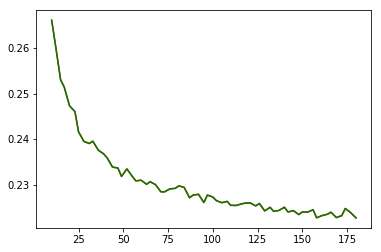

In [113]:
estimators = np.linspace(10, 180, 65, dtype = int)

error1 = []
error2 = []

for i in estimators:
    clf = RandomForestClassifier(n_estimators = i, oob_score=True)
    clf2 = RandomForestClassifier(n_estimators = i, max_features='sqrt', oob_score=True)
    clf.fit(x_train, y_train)
    clf2.fit(x_train, y_train)
    error1.append(1 - clf.oob_score_)
    error2.append(1 - clf.oob_score_)
    print(i)
    
plt.plot(estimators, error1, color = 'r')
plt.plot(estimators, error2, color = 'g')
plt.show()
winsound.Beep(10000, 440)

In [ ]:
rf = RandomForestRegressor(random_state=42)

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = [200, 'auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, \
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)
print("hi")

rf_random.fit(x_train, y_train)

rf_random.best_params_

best_random = rf_random.best_estimator_


winsound.Beep(10000, 440)

hi
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 461.5min


In [4]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(x_train, y_train)

In [ ]:
accuracy = evaluate(rf, x_train, y_train)

In [ ]:
clf = RandomForestClassifier(n_estimators=200, max_features=200, min_samples_leaf=25,oob_score=True)
clf.fit(x_train,y_train)
print(squared_loss(clf.predict_proba(x_train)[:,[1]], y_train))
print(clf.oob_score_)
